In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from catboost import CatBoostClassifier, Pool

In [2]:
###### bfb

In [3]:
data_path = 'data_sw_29-05.csv'

# загрузка по частям 

chunksize = 10 ** 6
df = pd.DataFrame()

volume_length = 50

dcs = ['mow', 'lux', 'was', 'sin', 'sjc', 'tko']

for dc in dcs:
    for chunk in pd.read_csv(data_path, iterator=True, chunksize=chunksize):
        df = df.append(chunk[chunk.dc_original == dc].head(volume_length), ignore_index=True)
        if df[df.dc_original == dc].shape[0] >= volume_length: break
df

hour  media_type  section_id country     size  bidder_id  is_matched  \
0      10           1     4419284      RU  240x400         37           1   
1      11           1     4419284      RU  240x400         37           1   
2       9           1     4419284      RU  240x400         37           1   
3      10           1     4419284      RU  240x400         12           1   
4      12           1     4419284      RU  240x400         37           1   
..    ...         ...         ...     ...      ...        ...         ...   
295     4           1     4072895      IN   320x50       1010           0   
296     8           1     4072895      IN  300x250        133           0   
297     5           1     4072895      IN  300x250       1133           0   
298     5           1     4072895      IN  300x250       2232           0   
299     3           1     4026068      JP   320x50         22           0   

     device_type traffic_type detected_domain  \
0              1          web       e.mail.ru   
1              1          web       e.mail.ru   
2              1          web       e.mail.ru   
3              1          web       e.mail.ru   
4              1          web       e.mail.ru   
..           ...          ...             ...   
295            2          app             NaN   
296            2          app             NaN   
297            2          app             NaN   
298            2          app             NaN   
299            2          app             NaN   

                              bundle dc_original  bid_floor_bucket  \
0                                NaN         mow              25.0   
1                                NaN         mow              25.0   
2                                NaN         mow              25.0   
3                                NaN         mow              35.0   
4                                NaN         mow              25.0   
..                               ...         ...               ...   
295        com.mxtech.videoplayer.ad         tko              40.0   
296        com.mxtech.videoplayer.ad         tko              60.0   
297        com.mxtech.videoplayer.ad         tko              50.0   
298        com.mxtech.videoplayer.ad         tko              45.0   
299  jp.co.airfront.android.a2chMate         tko              22.0   

    bidder_endpoint_id  bids   bidrs       net  
0                   37   614  272800  2.464927  
1                   37   449  266400  1.258498  
2                   37   534  252700  2.754887  
3                   12     0  240500  0.000000  
4                   37   256  239600  0.515124  
..                 ...   ...     ...       ...  
295               1010     0    2500  0.000000  
296                133     0    2500  0.000000  
297               1133     0    2500  0.000000  
298               2232     0    2500  0.000000  
299                 22     0    2400  0.000000  

[300 rows x 17 columns]

In [4]:
cat_class = CatBoostClassifier()
cat_class.load_model('model.cbm')

In [5]:
df = df.fillna('')
df['bid_floor_bucket'] = df['bid_floor_bucket'].astype('str')

In [8]:
times = {}
for dc in dcs:
    times[dc] = []
    for i in range(volume_length):
        start = time.time_ns()
        y_pred = cat_class.predict(df[df.dc_original == dc][i:i+1])
        end = time.time_ns()
        times[dc].append(end-start)

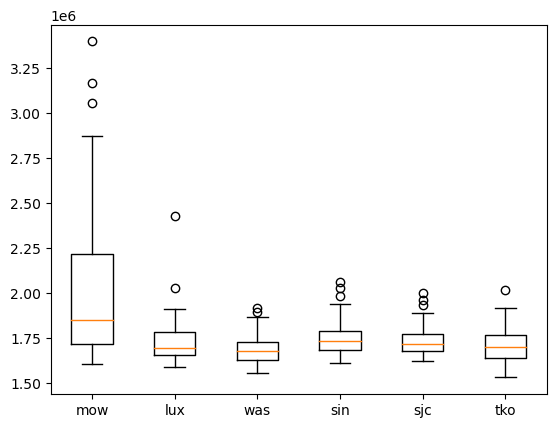

In [9]:
labels, data = [*zip(*times.items())]  

plt.boxplot(data)
plt.xticks(range(1, len(labels) + 1), labels)
plt.show()

In [ ]:
########### eeni

In [ ]:
data_path = 'data_sw_eeni_30-05.csv'

# загрузка по частям 

chunksize = 10 ** 6
df = pd.DataFrame()

volume_length = 1000

dcs = ['mow', 'lux', 'was', 'sin', 'sjc', 'tko']

for dc in dcs:
    for chunk in pd.read_csv(data_path, iterator=True, chunksize=chunksize):
        df = df.append(chunk[chunk.dc_original == dc].head(volume_length), ignore_index=True)
        if df[df.dc_original == dc].shape[0] >= volume_length: break
df

In [ ]:
cat_class = CatBoostClassifier()
cat_class.load_model('model.cbm')

In [ ]:
df = df.fillna('')
df['bid_floor_bucket'] = df['bid_floor_bucket'].astype('str')

In [ ]:
times = {}
for dc in dcs:
    times[dc] = []
    for i in range(volume_length):
        start = time.time_ns()
        y_pred = cat_class.predict(df[df.dc_original == dc][i:i+1])
        end = time.time_ns()
        times[dc].append(end-start)

In [ ]:
labels, data = [*zip(*times.items())]  

plt.boxplot(data)
plt.xticks(range(1, len(labels) + 1), labels)
plt.show()